# Experiments and results

### imports

In [1]:
from utils import lmo_fro, lmo_spectral, prox_l1, grad_gb, prox_mcp, spectral_prox_l1
from BCD import load_dataset, Hadamard_BCD

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

from tqdm import tqdm

from problems import generateWH, run_MoreauNSD, run_VS

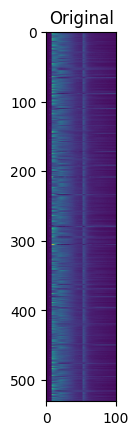

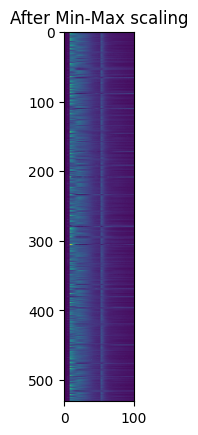

(531, 101)


In [2]:
# D = load_dataset("synthetic", m = 250, n = 250)
# D = load_dataset("olivetti")
# D = load_dataset("camera")
D = load_dataset("spectrometer")
# D = load_dataset("football")
# D = load_dataset("miserables")
# D = load_dataset("low_rank_synthetic")
# from scipy.linalg import svd
plt.imshow(D)
plt.title('Original')
plt.show()

# Min-Max Scaling
# Apply to each column (axis=0)
min_vals = D.min()
max_vals = D.max()

D = (D - min_vals) / (max_vals - min_vals)

plt.title('After Min-Max scaling')
plt.imshow(D)
plt.show()

# # Normalization
# D /= np.linalg.norm(D, 'fro')
# plt.title('After normalization')
# plt.imshow(D)
# plt.show()

print(D.shape)

## Experiments with rank = 10

### Run algorithms

In [18]:
rank = 10
# m = 200
# n = 1000
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= 10)

# W = W1*W2
# H = H1*H2
# W, H = generateWH(m, n, rank)
# D = W@H
# plt.imshow(D)
# F_min = np.linalg.norm(W, 1)
def g(W):
    s = svd(W, compute_uv=False)
    # S = np.zeros((m,rank))
    # for i in range(len(s)):
    #     S[i, i] = np.abs(s[i])
    return np.sum(np.abs(s))# U@S@Vt


print(D.shape)
norm_D = np.linalg.norm(D, 'fro')**2
print(norm_D)
# D /= norm_D

F_min = g(D)
K = 5_000

prox = spectral_prox_l1
# prox = prox_l1


loss_NSD, dist_W_prox_NSD, WHs_NSD = run_MoreauNSD(D, rank, prox, max_iter = K)
loss_NSD2, dist_W_prox_NSD2, WHs_NSD2 = run_MoreauNSD(D, rank, prox, max_iter = K, p = 7/12, q = 1/3)
# loss_cvxNSD, dist_W_prox_cvxNSD, WHs_cvxNSD = run_cvxMoreauNSD(D, rank, prox, max_iter = K)

# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")

# loss = run_MoreauNSD(D, 10, lmo = lmo_fro)
# plt.semilogy(loss/norm_D, label = 'l2 lmo')

loss_VS, dist_W_prox_VS, WHs_VS = run_VS(D, rank, prox, max_iter = K)


(531, 101)
1638.3121140391643


100%|██████████| 5000/5000 [00:06<00:00, 795.17it/s]


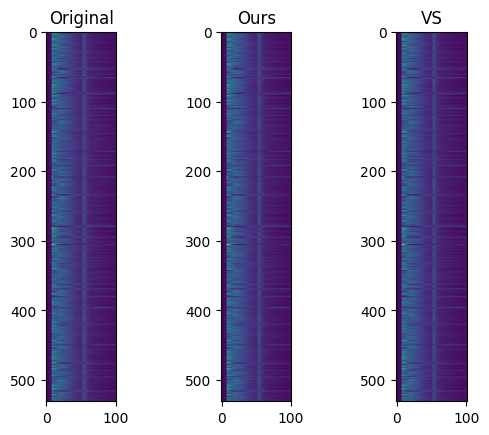

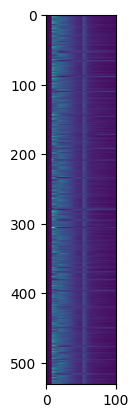

In [19]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(D)
ax[0].set_title('Original')

W, H = WHs_NSD[-1]
ax[1].imshow(norm_D*W@H)
ax[1].set_title('Ours')

W, H = WHs_VS[-1]
ax[2].imshow(W@H)
ax[2].set_title('VS')
plt.show()
# W, H = WHs_cvxNSD[-1]
# ax[3].imshow(norm_D*W@H)
# ax[3].set_title('Ours (CVX MNSD)')
W, H = WHs_NSD2[-1]
plt.imshow(norm_D*W@H)

In [ ]:
W, H = WHs_NSD[-1]
s = svd(W, compute_uv=False)
print(s)
print(s.sum())
W, H = WHs_NSD2[-1]
s = svd(W, compute_uv=False)
print(s)
print(s.sum())
W, H = WHs_VS[-1]
s = svd(W, compute_uv=False)
print(s)
print(s.sum())

[1.78437381 0.29702136 0.24079672 0.08730073 0.07186464 0.05211783
 0.03582249 0.03197425 0.02924939 0.02389684]
2.6544180633548575
[2.55965579 0.46268341 0.40150742 0.19603619 0.1684433  0.12691111
 0.09970288 0.04713865 0.00797555 0.00428396]
4.074338243643252


### Plots

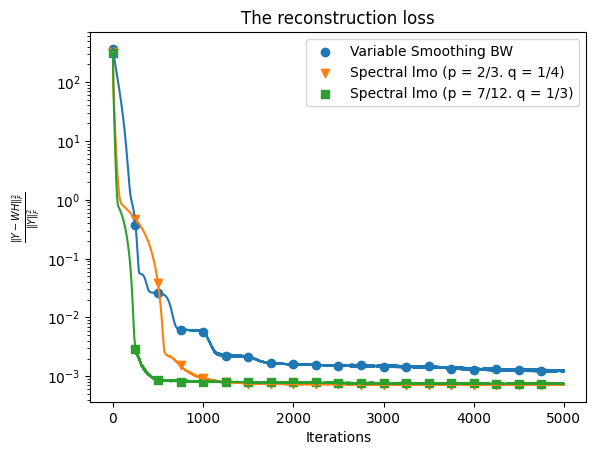

In [21]:
scatter_period = K // 20

plt.semilogy(loss_VS/norm_D)
plt.scatter(np.arange(len(loss_VS))[::scatter_period], loss_VS[::scatter_period]/norm_D, label = 'Variable Smoothing BW', marker="o")

plt.semilogy(loss_NSD/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD[::scatter_period]/norm_D, label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

plt.semilogy(loss_NSD2/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD2[::scatter_period]/norm_D, label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")

# plt.semilogy(loss_cvxNSD/norm_D)
# plt.scatter(np.arange(len(loss_cvxNSD))[::scatter_period], loss_cvxNSD[::scatter_period]/norm_D, label = 'Acc Spectral lmo', marker="^")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= K)
# print(len(error))
# plt.semilogy(error)
# plt.scatter(np.arange(len(error))[::50], error[::50], label = 'BCD', marker="^")

plt.ylabel(r'$\frac{\|Y - WH\|_F^2}{\|Y\|_F^2}$')
plt.xlabel('Iterations')
plt.title('The reconstruction loss')

plt.legend()
plt.show()
    

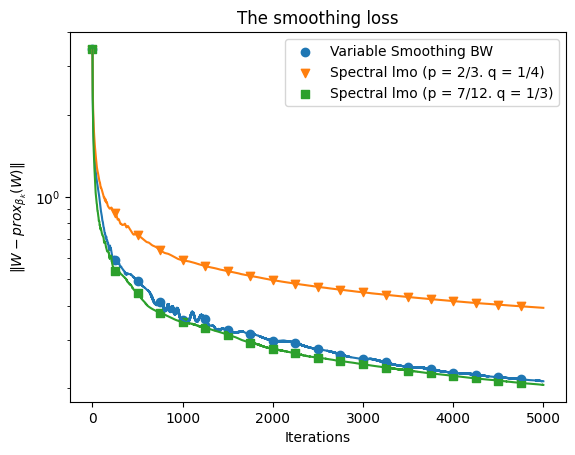

In [14]:
plt.semilogy(dist_W_prox_VS)
plt.scatter(np.arange(len(dist_W_prox_VS))[::scatter_period], dist_W_prox_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.semilogy(dist_W_prox_NSD)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD[::scatter_period], label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

plt.semilogy(dist_W_prox_NSD2)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD2[::scatter_period], label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")



plt.ylabel(r'$\|W - prox_{\beta_k}(W)\|$')
plt.xlabel('Iterations')
plt.title('The smoothing loss')

plt.legend()
plt.show()

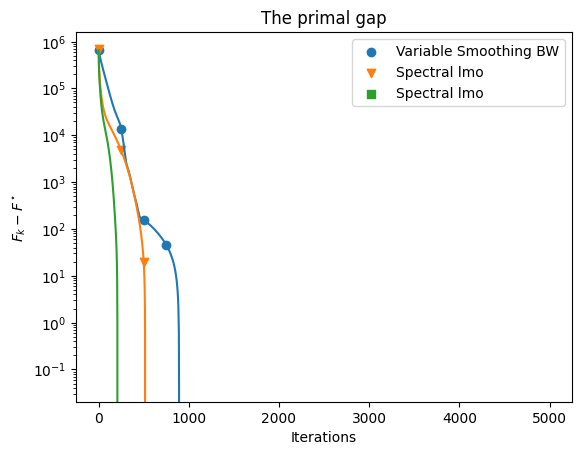

In [15]:
ls_VS = np.zeros(K+1)
g_VS = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_VS):
    g_VS[i] = g(W)
    ls_VS[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_VS[i] - F_min
plt.semilogy(ls_VS)
plt.scatter(np.arange(len(ls_VS))[::scatter_period], ls_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

ls_NSD = np.zeros(K+1)
g_NSD = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD):
    g_NSD[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

ls_NSD2 = np.zeros(K+1)
g_NSD2 = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD2):
    g_NSD2[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD2[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD2[::scatter_period], label = 'Spectral lmo', marker="s")

plt.ylabel(r'$F_k - F^\star$')
plt.xlabel('Iterations')
plt.title('The primal gap')

plt.legend()
plt.show()
    

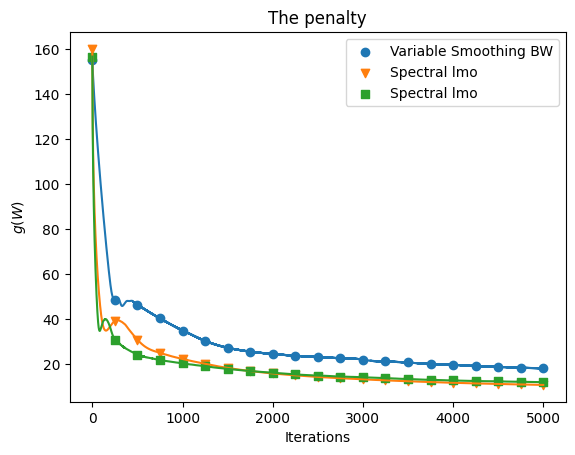

In [16]:
plt.plot(g_VS)
plt.scatter(np.arange(len(g_VS))[::scatter_period], g_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.plot(g_NSD)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

plt.plot(g_NSD2)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD2[::scatter_period], label = 'Spectral lmo', marker="s")

plt.ylabel(r'$g(W)$')
plt.xlabel('Iterations')
plt.title('The penalty')

plt.legend()
plt.show()

## Experiments with rank = 20

### Run algorithms

In [3]:
rank = 20
# m = 200
# n = 1000
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= 10)

# W = W1*W2
# H = H1*H2
# W, H = generateWH(m, n, rank)
# D = W@H
# plt.imshow(D)
# F_min = np.linalg.norm(W, 1)
def g(W):
    s = svd(W, compute_uv=False)
    # S = np.zeros((m,rank))
    # for i in range(len(s)):
    #     S[i, i] = np.abs(s[i])
    return np.sum(np.abs(s))# U@S@Vt


print(D.shape)
norm_D = np.linalg.norm(D, 'fro')**2
print(norm_D)
# D /= norm_D

F_min = g(D)
K = 5_000

prox = spectral_prox_l1
# prox = prox_l1


loss_NSD, dist_W_prox_NSD, WHs_NSD = run_MoreauNSD(D, rank, prox, max_iter = K)
loss_NSD2, dist_W_prox_NSD2, WHs_NSD2 = run_MoreauNSD(D, rank, prox, max_iter = K, p = 7/12, q = 1/3)
# loss_cvxNSD, dist_W_prox_cvxNSD, WHs_cvxNSD = run_cvxMoreauNSD(D, rank, prox, max_iter = K)

# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")

# loss = run_MoreauNSD(D, 10, lmo = lmo_fro)
# plt.semilogy(loss/norm_D, label = 'l2 lmo')

loss_VS, dist_W_prox_VS, WHs_VS = run_VS(D, rank, prox, max_iter = K)


(531, 101)
1638.3121140391643


100%|██████████| 5000/5000 [00:08<00:00, 610.12it/s]


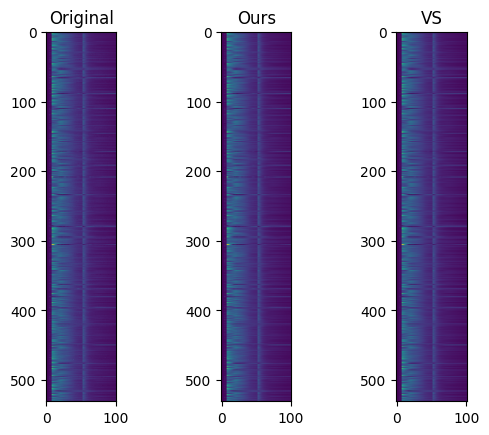

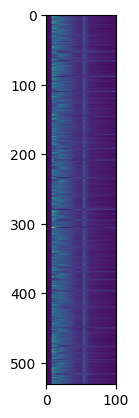

In [4]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(D)
ax[0].set_title('Original')

W, H = WHs_NSD[-1]
ax[1].imshow(norm_D*W@H)
ax[1].set_title('Ours')

W, H = WHs_VS[-1]
ax[2].imshow(W@H)
ax[2].set_title('VS')
plt.show()
# W, H = WHs_cvxNSD[-1]
# ax[3].imshow(norm_D*W@H)
# ax[3].set_title('Ours (CVX MNSD)')
W, H = WHs_NSD2[-1]
plt.imshow(norm_D*W@H)

In [5]:
W, H = WHs_NSD[-1]
s = svd(W, compute_uv=False)
# print(s)
print('Sum of the singular values for our algo', s.sum())
W, H = WHs_NSD2[-1]
s = svd(W, compute_uv=False)
# print(s)
print('Sum of the singular values for our algo2', s.sum())
W, H = WHs_VS[-1]
s = svd(W, compute_uv=False)
# print(s)
print('Sum of the singular values for the VS algo', s.sum())

Sum of the singular values for our algo 2.807273090412243
Sum of the singular values for our algo2 3.3875211326097454
Sum of the singular values for the VS algo 4.131220925406023


### Plots

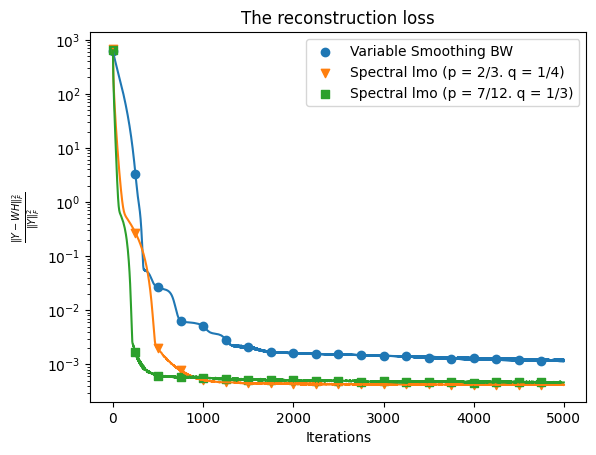

In [6]:
scatter_period = K // 20

plt.semilogy(loss_VS/norm_D)
plt.scatter(np.arange(len(loss_VS))[::scatter_period], loss_VS[::scatter_period]/norm_D, label = 'Variable Smoothing BW', marker="o")

plt.semilogy(loss_NSD/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD[::scatter_period]/norm_D, label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

plt.semilogy(loss_NSD2/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD2[::scatter_period]/norm_D, label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")

# plt.semilogy(loss_cvxNSD/norm_D)
# plt.scatter(np.arange(len(loss_cvxNSD))[::scatter_period], loss_cvxNSD[::scatter_period]/norm_D, label = 'Acc Spectral lmo', marker="^")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= K)
# print(len(error))
# plt.semilogy(error)
# plt.scatter(np.arange(len(error))[::50], error[::50], label = 'BCD', marker="^")

plt.ylabel(r'$\frac{\|Y - WH\|_F^2}{\|Y\|_F^2}$')
plt.xlabel('Iterations')
plt.title('The reconstruction loss')

plt.legend()
plt.show()
    

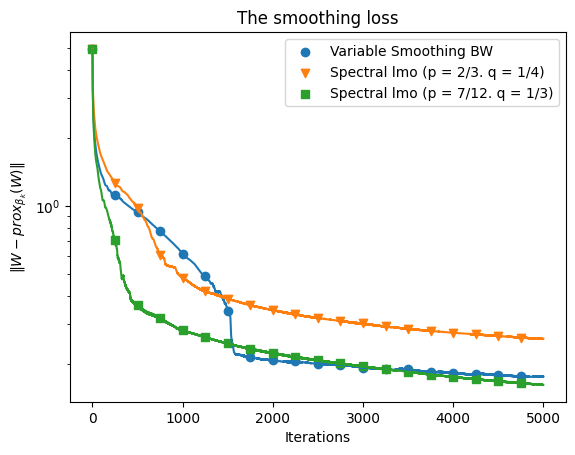

In [7]:
plt.semilogy(dist_W_prox_VS)
plt.scatter(np.arange(len(dist_W_prox_VS))[::scatter_period], dist_W_prox_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.semilogy(dist_W_prox_NSD)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD[::scatter_period], label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

plt.semilogy(dist_W_prox_NSD2)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD2[::scatter_period], label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")



plt.ylabel(r'$\|W - prox_{\beta_k}(W)\|$')
plt.xlabel('Iterations')
plt.title('The smoothing loss')

plt.legend()
plt.show()

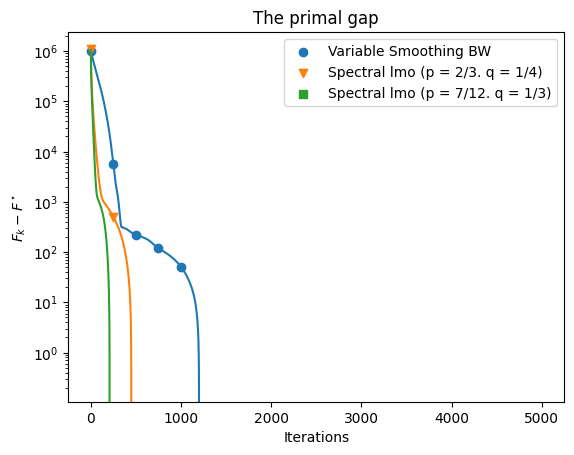

In [9]:
ls_VS = np.zeros(K+1)
g_VS = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_VS):
    g_VS[i] = g(W)
    ls_VS[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_VS[i] - F_min
plt.semilogy(ls_VS)
plt.scatter(np.arange(len(ls_VS))[::scatter_period], ls_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

ls_NSD = np.zeros(K+1)
g_NSD = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD):
    g_NSD[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD[::scatter_period], label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

ls_NSD2 = np.zeros(K+1)
g_NSD2 = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD2):
    g_NSD2[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD2[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD2[::scatter_period], label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")

plt.ylabel(r'$F_k - F^\star$')
plt.xlabel('Iterations')
plt.title('The primal gap')

plt.legend()
plt.show()
    

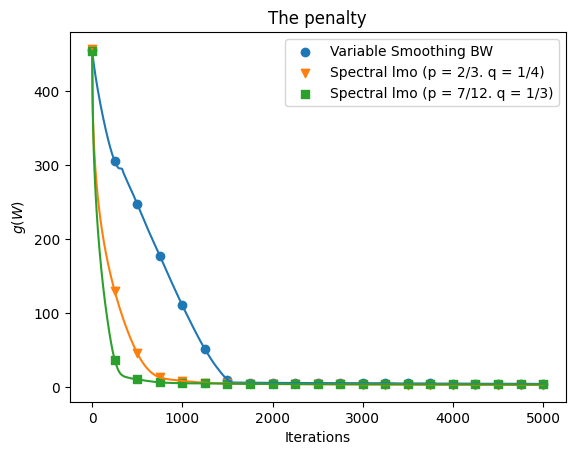

In [11]:
plt.plot(g_VS)
plt.scatter(np.arange(len(g_VS))[::scatter_period], g_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.plot(g_NSD)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD[::scatter_period], label = 'Spectral lmo (p = 2/3. q = 1/4)', marker="v")

plt.plot(g_NSD2)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD2[::scatter_period], label = 'Spectral lmo (p = 7/12. q = 1/3)', marker="s")

plt.ylabel(r'$g(W)$')
plt.xlabel('Iterations')
plt.title('The penalty')

plt.legend()
plt.show()